In [104]:
import numpy as np
from array import array
import xarray as xr
import matplotlib.pyplot as plt

### Define number of lats and lons

In [105]:
nlons=128
nlats=64

### Calculate Fortran record length for sequential access

In [ ]:
reclfseq=(nlons*nlats+2)*4

### Define path and file

In [106]:
path='/shared/metis/tco199/T42/gm8w/grid/1986110100/01/'
fname='gm8w_1986110100_01_N32.data'

### Read Data

In [107]:
# Open Data File
luin = open(path+fname,'rb')

# Read in fortran record in bytes
tmp=luin.read(reclfseq)

# Convert to single precision (real 32bit)
tmp1=array('f',tmp)  

# Pull out data array (leaving behind fortran control records)
tmp2=tmp1[1:-1] 

# Create a 2D Array
data=np.reshape(tmp2,(nlats,nlons))  

# Confirm the Data Shape
data.shape

(64, 128)

### Define lons and lats

In [113]:
lats=[-87.86, -85.10, -82.31, -79.53, -76.74, -73.95, -71.16, -68.37, \
      -65.58, -62.79, -60.00, -57.21, -54.42, -51.63, -48.84, -46.04, \
      -43.25, -40.46, -37.67, -34.88, -32.09, -29.30, -26.51, -23.72, \
      -20.93, -18.14, -15.35, -12.56, -9.77,  -6.98,  -4.19,  -1.40, \
      1.40,   4.19,   6.98,   9.77,  12.56,  15.35,  18.14,  20.93, \
      23.72,  26.51,  29.30,  32.09,  34.88,  37.67,  40.46,  43.25, \
      46.04,  48.84,  51.63,  54.42,  57.21,  60.00,  62.79,  65.58, \
      68.37,  71.16,  73.95,  76.74,  79.53,  82.31,  85.10,  87.86]
lats=lats[::-1]
print(lats)
lons=np.arange(128)*2.8125 + 0.0

[87.86, 85.1, 82.31, 79.53, 76.74, 73.95, 71.16, 68.37, 65.58, 62.79, 60.0, 57.21, 54.42, 51.63, 48.84, 46.04, 43.25, 40.46, 37.67, 34.88, 32.09, 29.3, 26.51, 23.72, 20.93, 18.14, 15.35, 12.56, 9.77, 6.98, 4.19, 1.4, -1.4, -4.19, -6.98, -9.77, -12.56, -15.35, -18.14, -20.93, -23.72, -26.51, -29.3, -32.09, -34.88, -37.67, -40.46, -43.25, -46.04, -48.84, -51.63, -54.42, -57.21, -60.0, -62.79, -65.58, -68.37, -71.16, -73.95, -76.74, -79.53, -82.31, -85.1, -87.86]


### Quick test plot

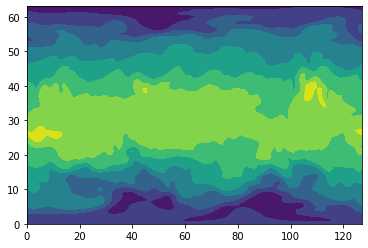

In [114]:
plt.contourf(data)

### Make xarray dataset

In [115]:
ds=xr.DataArray(data,
                coords={'lat':lats,
                        'lon': lons},
                        dims=['lat','lon'])        
ds=ds.to_dataset(name='temp')
ds

<xarray.Dataset>
Dimensions:  (lat: 64, lon: 128)
Coordinates:
  * lat      (lat) float64 87.86 85.1 82.31 79.53 ... -79.53 -82.31 -85.1 -87.86
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    temp     (lat, lon) float32 259.0288 259.05154 ... 253.68103 253.6028

### Quick test plot

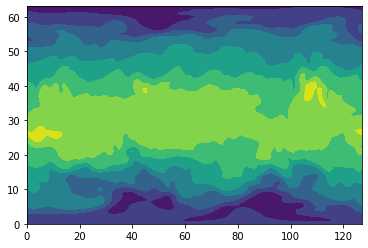

In [117]:
plt.contourf(ds['temp'])

### Write to netcdf

In [118]:
ds.to_netcdf('tempgaussian.128x64.nc')